# Kuznets Curve for Countries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Extracting data

co2 = pd.read_csv('co2_full.csv', usecols=['country', 'year', 'code', 'population', 'gdp', 'co2_per_capita'])

co2.drop_duplicates(inplace=True)
co2.dropna(inplace=True)

co2 = co2.rename(columns={'country': 'Country'})

co2.head()

,Country,year,code,population,gdp,co2_per_capita
100,Afghanistan,1950,AFG,7480464.0,9.421400e+09,0.011
101,Afghanistan,1951,AFG,7571542.0,9.692280e+09,0.012
102,Afghanistan,1952,AFG,7667534.0,1.001733e+10,0.012
103,Afghanistan,1953,AFG,7764549.0,1.063052e+10,0.014
104,Afghanistan,1954,AFG,7864289.0,1.086636e+10,0.014


In [3]:
# Creating GDP per capita

co2['gdp_per_capita'] = co2['gdp'] / co2['population']

co2.head()

,Country,year,code,population,gdp,co2_per_capita,gdp_per_capita
100,Afghanistan,1950,AFG,7480464.0,9.421400e+09,0.011,1259.467336
101,Afghanistan,1951,AFG,7571542.0,9.692280e+09,0.012,1280.093250
102,Afghanistan,1952,AFG,7667534.0,1.001733e+10,0.012,1306.459816
103,Afghanistan,1953,AFG,7764549.0,1.063052e+10,0.014,1369.109759
104,Afghanistan,1954,AFG,7864289.0,1.086636e+10,0.014,1381.734613


In [4]:
# Kuznets curves

year_min = 1960
countries = ['United States', 'China', 'Brazil', 'India', 'Russia', 'South Africa', 'Nigeria', 'Sweden', 'Japan', 'Mexico', 'South Korea', 'France', 'Argentina', 'Germany', 'United Kingdom', 'Turkey', 'Indonesia', 'Italy', 'Egypt', 'Thailand']

emissions = {}

for country in countries:
    emissions[country] = co2.loc[(co2['Country'] == country) & (co2['year'] >= year_min)]
    
emissions_df = pd.concat(emissions.values(), ignore_index=True)

emissions_df.head()

,Country,year,code,population,gdp,co2_per_capita,gdp_per_capita
0,United States,1960,USA,176188576.0,3.260000e+12,16.444,18502.902254
1,United States,1961,USA,179087280.0,3.340000e+12,16.120,18650.124118
2,United States,1962,USA,181917808.0,3.540000e+12,16.457,19459.337373
3,United States,1963,USA,184649872.0,3.690000e+12,16.932,19983.766899
4,United States,1964,USA,187277376.0,3.910000e+12,17.430,20878.122513


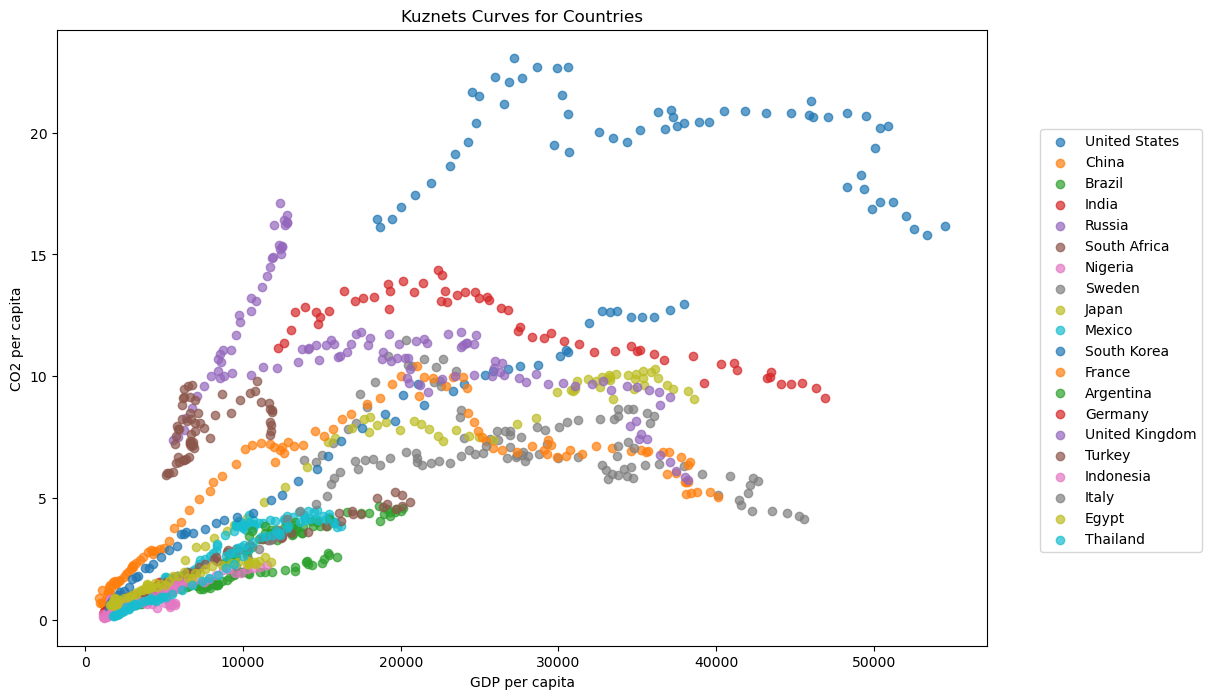

In [5]:
# Plotting Kuznets Curves

fig, ax = plt.subplots(figsize=(12, 8))

for country in countries:
    data = emissions[country]
    ax.scatter(data['gdp_per_capita'], data['co2_per_capita'], label=country, alpha=0.7)

ax.set_xlabel('GDP per capita')
ax.set_ylabel('CO2 per capita')

ax.set_title('Kuznets Curves for Countries')

ax.legend(bbox_to_anchor=(1.05, 0.85), loc='upper left')

plt.show()

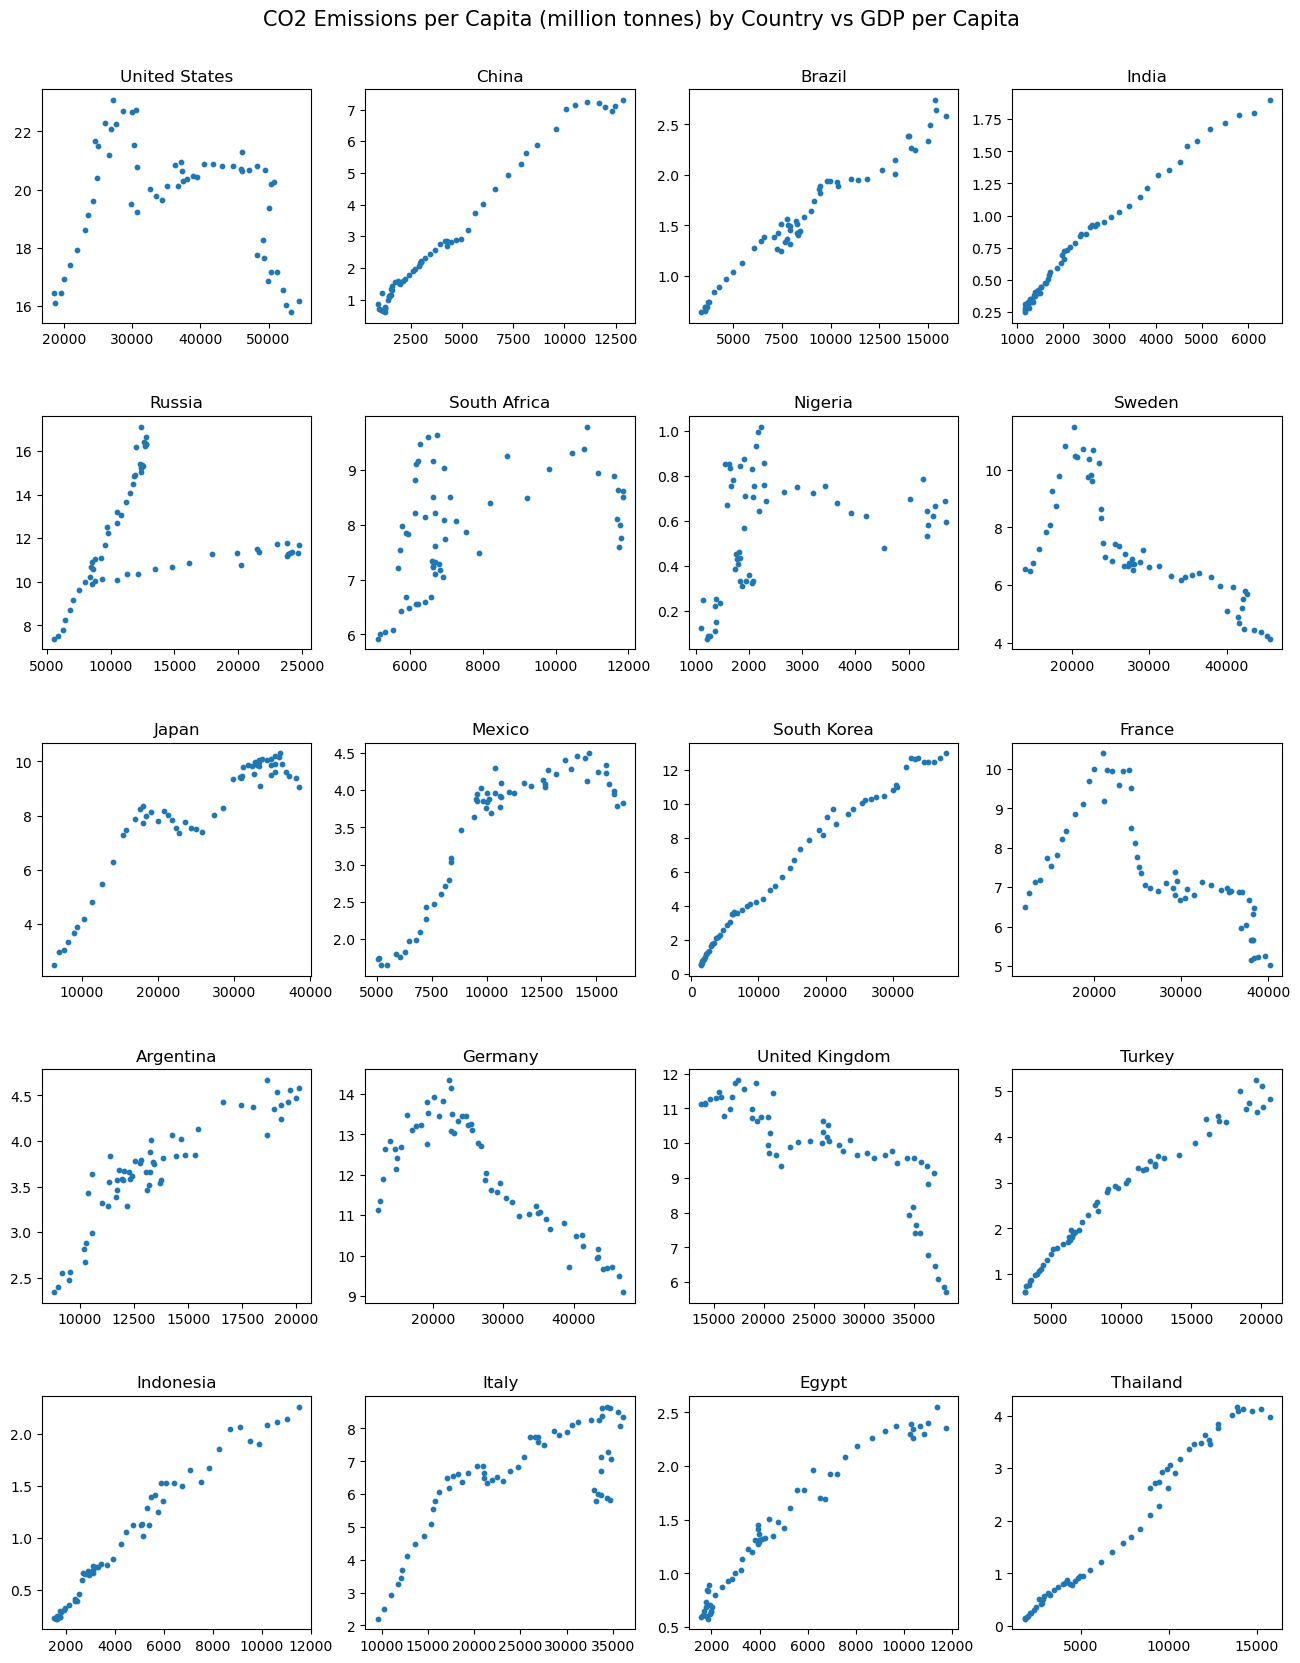

In [6]:
# Creating a figure and subplots

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 20))
fig.subplots_adjust(hspace=0.4)

for i, country in enumerate(countries):
    row = i // 4
    col = i % 4
    
    ax = axes[row, col]
    
    x = (emissions[country]['gdp_per_capita'])
    y = (emissions[country]['co2_per_capita'])
    
    ax.scatter(x, y, s=10)
    ax.set_title(country)
    
fig.suptitle('CO2 Emissions per Capita (million tonnes) by Country vs GDP per Capita', fontsize=15, y=0.92)

plt.show()

In [8]:
# Co2 per capita per year

co2_by_country_year = pd.pivot_table(co2, values='co2_per_capita', index='year', columns='Country')
co2_by_country_year = co2_by_country_year.loc[year_min:]
co2_by_country_year = co2_by_country_year[countries]

co2_by_country_year.head()

Country,United States,China,Brazil,India,Russia,South Africa,Nigeria,Sweden,Japan,Mexico,South Korea,France,Argentina,Germany,United Kingdom,Turkey,Indonesia,Italy,Egypt,Thailand
year,,,,,,,,,,,,,,,,,,,,
1960,16.444,1.221,0.641,0.250,7.388,5.923,0.076,6.562,2.461,1.739,0.486,6.486,2.396,11.140,11.115,0.611,0.242,2.205,0.593,0.139
1961,16.120,0.871,0.652,0.264,7.514,6.011,0.090,6.475,2.966,1.743,0.544,6.842,2.472,11.342,11.135,0.614,0.286,2.497,0.615,0.151
1962,16.457,0.692,0.691,0.284,7.790,6.037,0.089,6.762,3.042,1.648,0.634,7.139,2.552,11.903,11.149,0.744,0.246,2.916,0.652,0.178
1963,16.932,0.668,0.694,0.298,8.266,6.082,0.112,7.247,3.340,1.658,0.756,7.174,2.342,12.641,11.276,0.759,0.237,3.255,0.736,0.191
1964,17.430,0.654,0.688,0.285,8.710,6.426,0.149,7.848,3.650,1.795,0.777,7.743,2.564,12.846,11.286,0.859,0.227,3.446,0.849,0.249


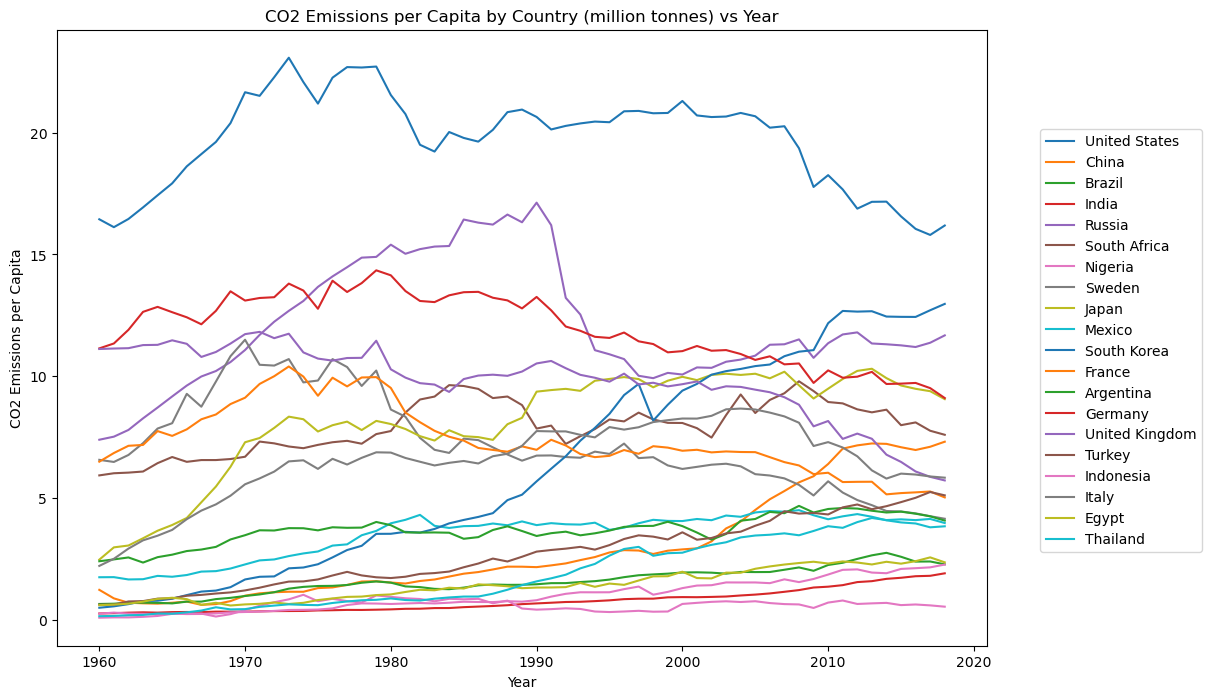

In [9]:
# Plotting in the same plot

fig, ax = plt.subplots(figsize=(12, 8))

for country in co2_by_country_year.columns:
    ax.plot(co2_by_country_year.index, co2_by_country_year[country], label=country, linestyle='-')

ax.set_xlabel('Year')
ax.set_ylabel('CO2 Emissions per Capita')
ax.set_title('CO2 Emissions per Capita by Country (million tonnes) vs Year')
ax.legend(bbox_to_anchor=(1.05, 0.85), loc='upper left')

plt.show()

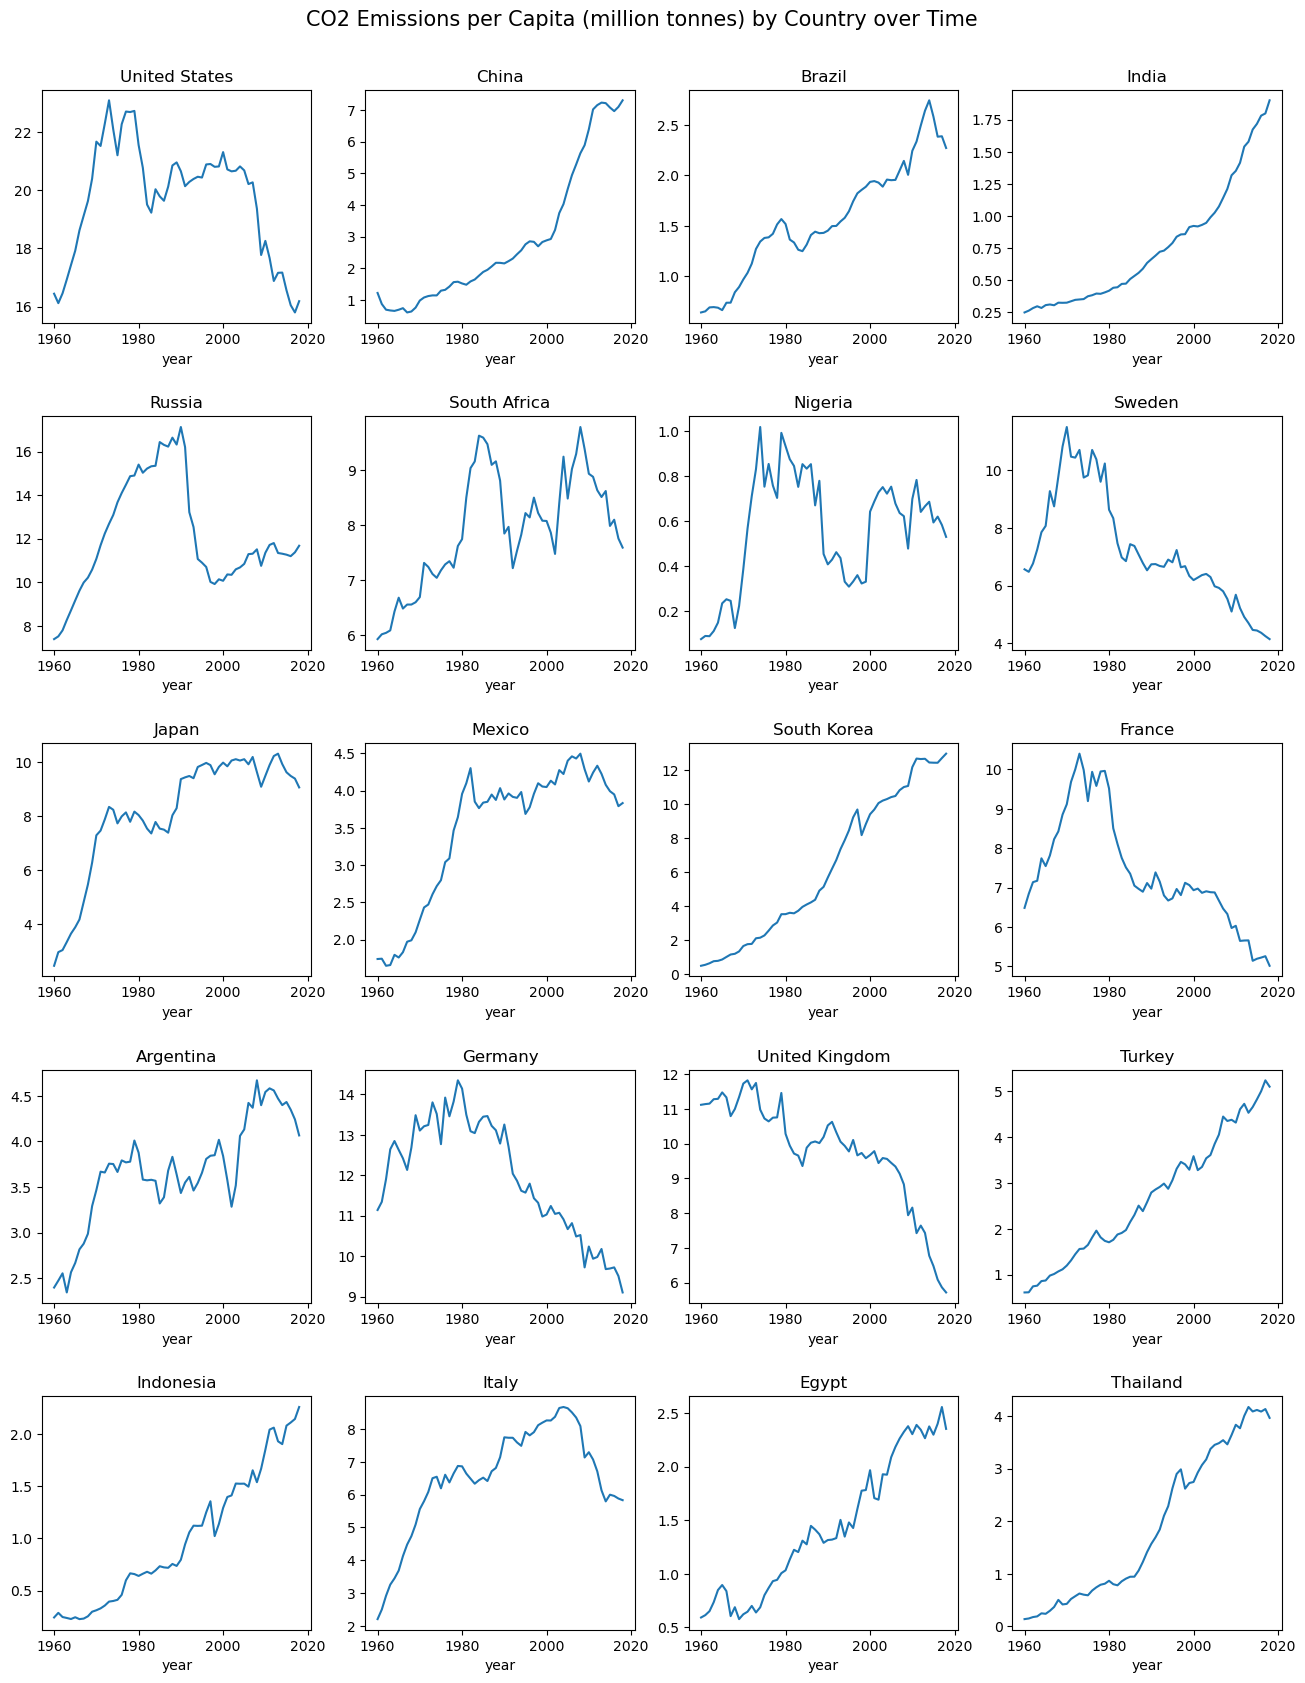

In [10]:
# Creating a figure and subplots

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 20))
fig.subplots_adjust(hspace=0.4)

axes = axes.flatten()

for i, country in enumerate(countries):
    co2_by_country_year[country].plot(ax=axes[i], label=country)
    axes[i].set_title(country)

fig.suptitle('CO2 Emissions per Capita (million tonnes) by Country over Time', fontsize=15, y=0.92)

for i in range(len(countries), len(axes)):
    fig.delaxes(axes[i])